<a href="https://colab.research.google.com/github/sushiiel22bds0390/opendatasets/blob/master/US_ELECTRIC_RATE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn import linear_model

In [3]:
dataset=pd.read_csv("/content/sample_data/iouzipcodes2018.csv")

In [4]:
import os
import sys
import pickle

projectabspathname = os.path.abspath('projectname.pickle')
print(projectabspathname)
projectname = 'US_ELECTRIC_RATE.ipynb'
projectpickle = open(str(projectabspathname),'wb')
pickle.dump(projectname, projectpickle)
projectpickle.close()

/content/projectname.pickle


In [5]:
dataset.head()

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate
0,85321,176,Ajo Improvement Co,AZ,Bundled,Investor Owned,0.107414,0.000000,0.113439
1,35218,195,Alabama Power Co,AL,Bundled,Investor Owned,0.116543,0.063118,0.128096
2,35219,195,Alabama Power Co,AL,Bundled,Investor Owned,0.116543,0.063118,0.128096
3,35214,195,Alabama Power Co,AL,Bundled,Investor Owned,0.116543,0.063118,0.128096
4,35215,195,Alabama Power Co,AL,Bundled,Investor Owned,0.116543,0.063118,0.128096


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
num_columns = dataset.shape[1]
for i in range(0,num_columns):
  column_names = dataset.columns
  print(column_names[i])




zip
eiaid
utility_name
state
service_type
ownership
comm_rate
ind_rate
res_rate


enter the variable1 to visuallisestate
enter the variable2 to visualiseres_rate


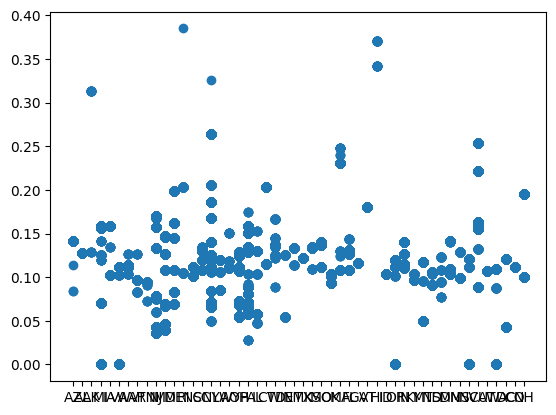

In [7]:
str1=input("enter the variable1 to visuallise")
str2=input("enter the variable2 to visualise")
plt.scatter(dataset[str1],dataset[str2])

In [8]:
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values

In [11]:
# imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
# imputer.fit(X[:,:-1])
# X[:,:-1]=imputer.transform(X[:,:-1])

In [9]:
le=LabelEncoder()
y=le.fit_transform(y)
print(y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

[ 94 125 125 ...  40  40  40]


In [10]:
num1=int(input("enter the number of columns to be encoded"))
for i in range(0,num1):
  str3=input("enter the column name to encode")
  part=dataset[str3]
  le1=LabelEncoder()
  part=le1.fit_transform(part)
  print(part)

enter the number of columns to be encoded3
enter the column name to encodestate
[3 1 1 ... 4 4 4]
enter the column name to encodeutility_name
[  1   2   2 ... 107 107 107]
enter the column name to encodeownership
[0 0 0 ... 0 0 0]


In [11]:
dataset = dataset.drop("utility_name", axis=1)
dataset=dataset.join(pd.get_dummies(dataset.state))
dataset=dataset.drop("state",axis=1)
dataset=dataset.join(pd.get_dummies(dataset.service_type))
dataset=dataset.drop("service_type",axis=1)
dataset=dataset.join(pd.get_dummies(dataset.ownership))
dataset=dataset.drop("ownership",axis=1)

<Axes: >

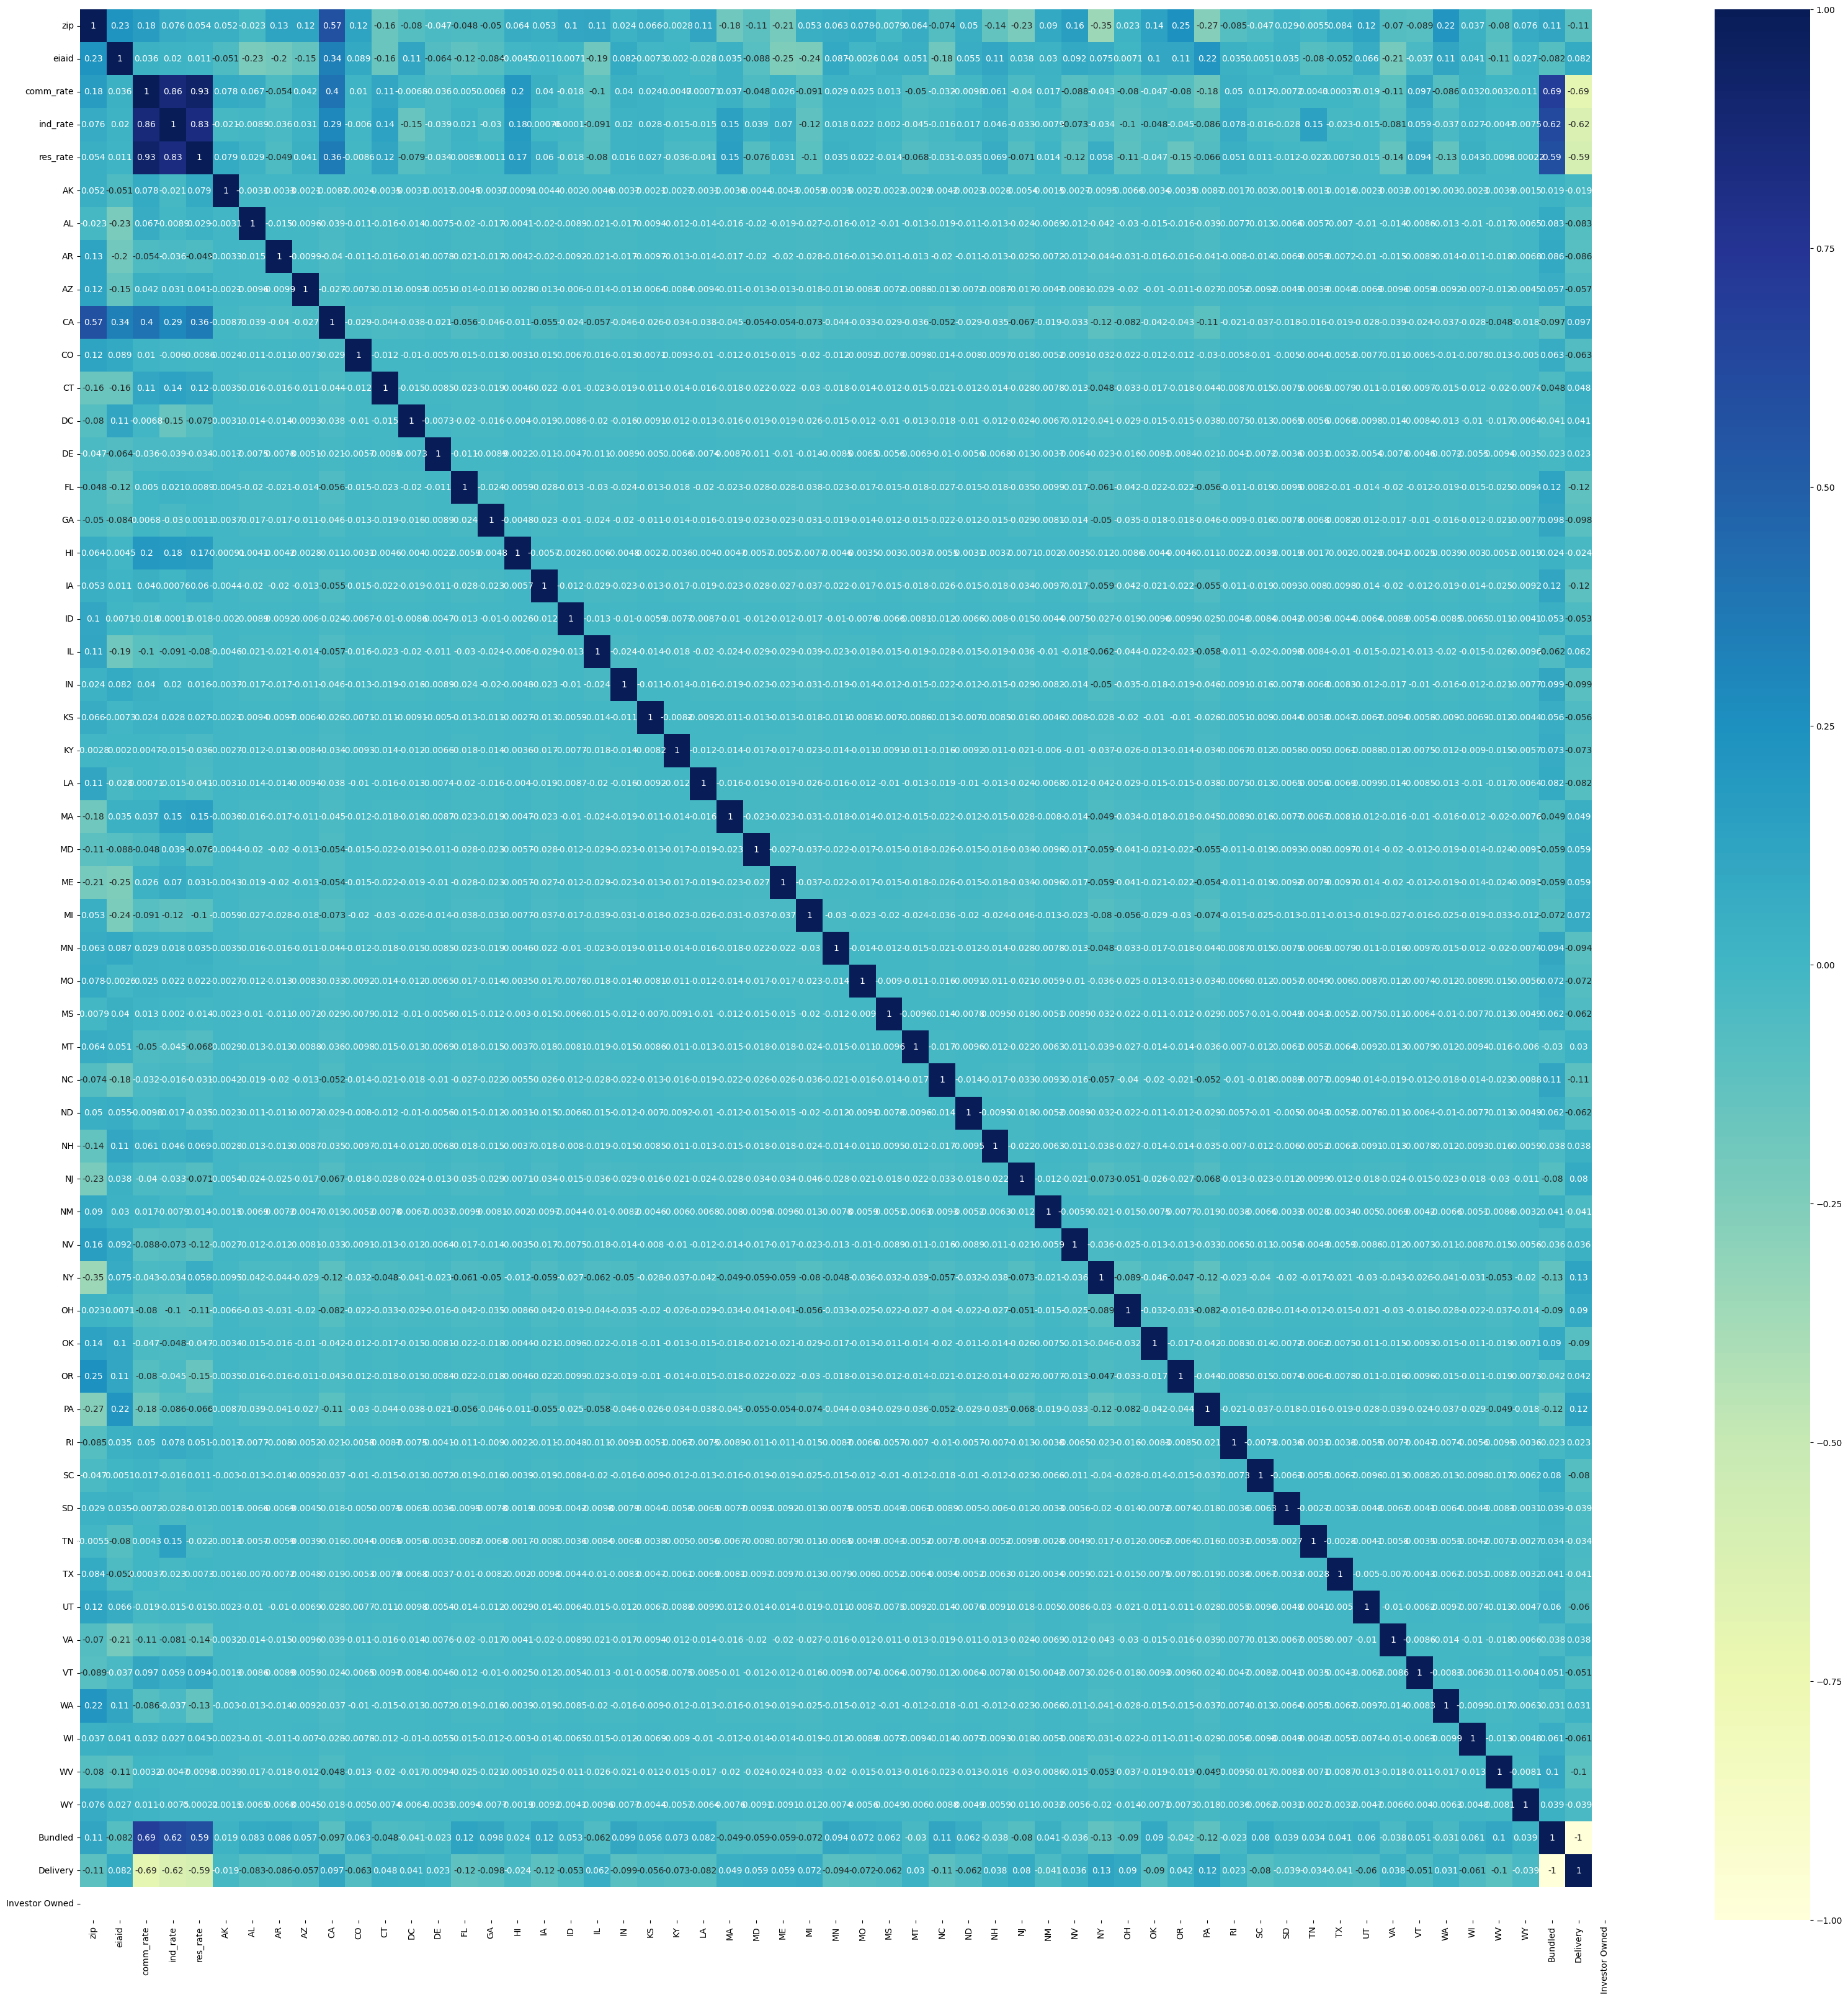

In [12]:
plt.figure(figsize=(40, 40))
sns.heatmap(dataset.corr(), annot=True, cmap="YlGnBu")

In [13]:
target_correlations=dataset.corr()['res_rate'].apply(abs).sort_values()
target_correlations

WY                0.000224
GA                0.001130
TX                0.007268
CO                0.008572
FL                0.008928
WV                0.009842
eiaid             0.010643
SC                0.010656
SD                0.011688
NM                0.014390
MS                0.014486
UT                0.014808
IN                0.016046
ID                0.018112
TN                0.022020
MO                0.022052
KS                0.026785
AL                0.028904
ME                0.030869
NC                0.031417
DE                0.033511
ND                0.034544
MN                0.034603
KY                0.036393
AZ                0.040750
LA                0.040799
WI                0.042576
OK                0.046672
AR                0.048824
RI                0.051257
zip               0.054201
NY                0.058276
IA                0.060147
PA                0.066142
MT                0.067877
NH                0.068567
NJ                0.071172
M

In [14]:
dataset.head()

,zip,eiaid,comm_rate,ind_rate,res_rate,AK,AL,AR,AZ,CA,...,UT,VA,VT,WA,WI,WV,WY,Bundled,Delivery,Investor Owned
0,85321,176,0.107414,0.000000,0.113439,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
1,35218,195,0.116543,0.063118,0.128096,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,35219,195,0.116543,0.063118,0.128096,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,35214,195,0.116543,0.063118,0.128096,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,35215,195,0.116543,0.063118,0.128096,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [15]:
myfeatures=target_correlations[-21:].index
myfeatures=list(myfeatures)
myfeatures
mydataset=dataset[myfeatures]
mydataset

,MD,AK,DC,IL,VT,MI,OH,NV,CT,WA,...,OR,MA,HI,CA,Bundled,Delivery,ind_rate,comm_rate,res_rate,Investor Owned
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.000000,0.107414,0.113439,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.063118,0.116543,0.128096,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.063118,0.116543,0.128096,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.063118,0.116543,0.128096,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.063118,0.116543,0.128096,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.035303,0.061650,0.088734,1
42852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.035303,0.061650,0.088734,1
42853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.035303,0.061650,0.088734,1
42854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0.035303,0.061650,0.088734,1


In [16]:
X,y=mydataset.drop("res_rate",axis=1),mydataset["res_rate"]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.15)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [17]:
values=[]
def find_best_accuracy():
  forest=RandomForestRegressor()
  forest.fit(X_train_scaled, y_train)
  value1=forest.score(X_test_scaled, y_test)
  values.append(value1)
  y_pred=forest.predict(X_test_scaled)
  regr1=svm.SVR()
  regr1.fit(X_train_scaled,y_train)
  predict1=regr1.predict(X_test_scaled)
  value2=regr1.score(X_test_scaled, y_test)
# print(predict1)
  values.append(value2)
  regr2=linear_model.LinearRegression()
  regr2.fit(X_train_scaled,y_train)
  value3=regr2.score(X_test_scaled,y_test)
  values.append(value3)
  regr3 = linear_model.Ridge(alpha=.8)
  regr3.fit(X_train_scaled,y_train)
  value4=regr3.score(X_test_scaled,y_test)
  values.append(value4)
  max=0
  model=[]
  for i in range(4):
    print(values[i])
  for i in range(4):
    if(max<values[i]):
      max=values[i]
      model.append(i)
  print(max)
  if(model[-1]==0):
    print("Best model for this dataset is Random forest")
  elif(model[-1]==1):
    print("Best model for this dataset is SVR")
  elif(model[-1]==2):
    print("Best model for this dataset is Linear Regression")
  else:
    print("Best model for this dataset is Ridge")

In [18]:
sv = find_best_accuracy()

0.999987181959208
-0.010164627670543158
0.8950668633434004
0.8950536760300922
0.999987181959208
Best model for this dataset is Random forest


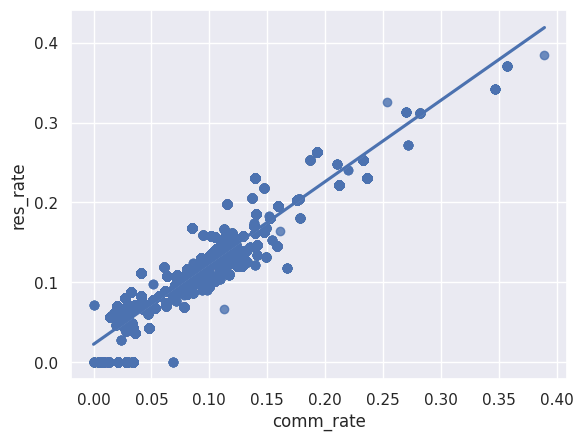

In [19]:
sns.set_theme(color_codes=True)
sample=pd.read_csv("/content/sample_data/iouzipcodes2018.csv")
sns.regplot(x="comm_rate", y="res_rate", data=sample);

In [20]:
forest=RandomForestRegressor()
forest.fit(X_train_scaled, y_train)
scaledx=scaler.transform([X_test.iloc[0]])
forest.predict(scaledx)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0.22216149])

In [21]:
for i in range(10):
  print(y_test.iloc[i])


0.2221614934073073
0.2310401433839505
0.1954962717194592
0.1083220679931454
0.046678490326735
0.1313543085079034
0.0676218353748849
0.2221614934073073
0.0908980116371154
0.0662749059130734


In [30]:
#https://catalog.data.gov/dataset/u-s-electric-utility-companies-and-rates-look-up-by-zipcode-2018-5a6f1

In [22]:
pickle.dump(sv,open('us.pkl','wb'))